In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv('Salary_data_corrected.csv')
#df = pd.read_excel('/Users/sandeepk/Downloads/salary_data_states_corrected.xlsx')

In [2]:
#import kaleido

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

#import plotly.express as px
#import plotly.io as pio
#px.defaults.width = 700
#px.defaults.height = 500

In [3]:
#import  scipy.signal.signaltools
#import plotly.io as pio
#pio.renderers.default='notebook'

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

#scipy.signal.signaltools._centered = _centered

# Data Cleansing

### Actvities:
- N/A Report
    - Replaced, Estimated, and Dropped

In [4]:
#Recieve na reporting
ls = list(df.columns)
for x in ls:
  if sum(df[x].isna()) > 0:
    print(x)
    print(sum(df[x].isna()))
    print()

EDUCATION_LEVEL_REQUIRED
5220

COLLEGE_MAJOR_REQUIRED
5220

EXPERIENCE_REQUIRED_Y_N
5220

EXPERIENCE_REQUIRED_NUM_MONTHS
5224

COUNTRY_OF_CITIZENSHIP
5220

WORK_POSTAL_CODE
3168

FULL_TIME_POSITION_Y_N
9

QOL_Poor
4285

QOL_Average
951

QOL_High
5222



In [5]:
df0 = df.copy()
sum(df0["WORK_CITY"].isna())

0

In [6]:
df0.reset_index(drop=True, inplace=True)

In [7]:
#Drop rows missing work city as we can not confirm a work-state without this information
df0.dropna(subset=["WORK_CITY"], inplace=True)
#sum(df0["WORK_CITY"].isna())
df0["WORK_CITY"]

0          CAMPBELL
1          CAMPBELL
2        MENLO PARK
3         CUPERTINO
4        MENLO PARK
           ...     
5224    MORRISVILLE
5225           CARY
5226           CARY
5227      HOLLYWOOD
5228        HOUSTON
Name: WORK_CITY, Length: 5229, dtype: object

In [8]:
df0["PREVAILING_WAGE_SUBMITTED_UNIT"].unique()

array(['year', 'hour', 'week', 'month'], dtype=object)

In [9]:
ls1 = df0["PAID_WAGE_SUBMITTED_UNIT"].unique()
ls1

array(['year', 'hour', 'bi-weekly', 'week', 'month'], dtype=object)

Options for viewing Salary types
1.) PREVAILING_WAGE_SUBMITTED
2.) PAID_WAGE_SUBMITTED

Enter a Salary View: 1

Options for viewing Salary time-periods
1) year
2) hour
3) bi-weekly
4) week
5) month

Enter a Time-period: 1

Descriptive Statistics
---------------------
MAX: $148,803.00
MIN: $18,658.00
AVG: $70,393.45
STDV: $21,925.22
Percentiles:
0.250     55224.0
0.500     64147.5
0.999    146976.0
Name: PREVAILING_WAGE_SUBMITTED, dtype: float64


,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PREVAILING_WAGE_PER_YEAR
0,148803.0,year,148803.0
1,148803.0,year,148803.0
2,148158.0,year,148158.0
3,147472.0,year,147472.0
4,147463.0,year,147463.0
...,...,...,...
5222,24648.0,year,24648.0
5221,24648.0,year,24648.0
5220,24648.0,year,24648.0
5227,19677.0,year,19677.0


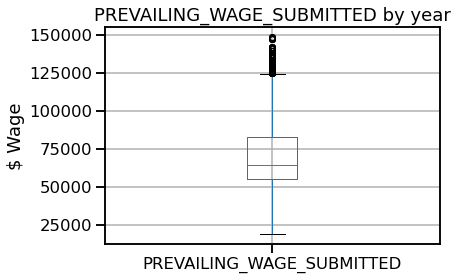

In [10]:
#View outliers in Salary types
#Run this code again to validate after making modifications in codeblock below
import seaborn as sns 

df100 = df0.copy()
print("Options for viewing Salary types")
print("1.) PREVAILING_WAGE_SUBMITTED")
print("2.) PAID_WAGE_SUBMITTED")
print()
choice1 = int(input("Enter a Salary View: "))
if choice1 == 1:
  choice1= "PREVAILING_WAGE_SUBMITTED"
elif choice1 == 2:
  choice1 = "PAID_WAGE_SUBMITTED"

print()
print("Options for viewing Salary time-periods")
hold = 0
for t in ls1:
  hold+=1
  print(f'{hold}) {t}')


print()

choice2 = int(input("Enter a Time-period: "))
choice2 = ls1[choice2-1]

#Descriptive Statistics
df100 = df100[df100[f'{choice1}_UNIT']== choice2]
print()
print("Descriptive Statistics")
print('---------------------')
print(f'MAX: ${df100[choice1].max():,.2f}')
print(f'MIN: ${df100[choice1].min():,.2f}')
print(f'AVG: ${df100[choice1].mean():,.2f}')
print(f'STDV: ${df100[choice1].std():,.2f}')
print("Percentiles:")
print(df100[choice1].quantile(q=[0.25,0.5,0.999]))


choice3 = choice1[-11::-1]

df100 = df100[[choice1, f'{choice1}_UNIT', f'{choice3[-1::-1]}_PER_YEAR' ]].sort_values(by = [choice1], ascending=False)

#Time-series Boxplot
bplot = df100.boxplot(column = [choice1])
bplot.set_ylabel('$ Wage')
bplot.set_title(f'{choice1} by {choice2}')

df100

In [11]:

#Label Prevailing + Paid Wage unit correctly based on a salary threshold to remove outliers/errors
mylst = ['PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED']
for x in mylst:
  index = -1
  for char in df0[f'{x}_UNIT']:
    index += 1
    if char != "year" and df0[x].iloc[index] > 30000:
      df0[f'{x}_UNIT'].iloc[index] = "year"
    elif char != "hour" and df0[x].iloc[index] < 300:
      df0[f'{x}_UNIT'].iloc[index] = "hour"
    else:
      index+=0
  

#Add values to the na values under Prevailing Wage per Year column through appropriate estimation
i = -1

for a in df0["PREVAILING_WAGE_PER_YEAR"]:
  i+=1
  if type(a) == float and pd.isna(a):
    if df0["PREVAILING_WAGE_SUBMITTED_UNIT"].iloc[i] == "year":
      df0["PREVAILING_WAGE_PER_YEAR"].iloc[i] = df0["PREVAILING_WAGE_SUBMITTED"].iloc[i]
    elif df0["PREVAILING_WAGE_SUBMITTED_UNIT"].iloc[i] == "month":
      df0["PREVAILING_WAGE_PER_YEAR"].iloc[i] = df0["PREVAILING_WAGE_SUBMITTED"].iloc[i] * 12
    elif df0["PREVAILING_WAGE_SUBMITTED_UNIT"].iloc[i] == "week":
      df0["PREVAILING_WAGE_PER_YEAR"].iloc[i] = df0["PREVAILING_WAGE_SUBMITTED"].iloc[i] * 52
    elif df0["PREVAILING_WAGE_SUBMITTED_UNIT"].iloc[i] == "bi-weekly":
      df0["PREVAILING_WAGE_PER_YEAR"].iloc[i] = df0["PREVAILING_WAGE_SUBMITTED"].iloc[i] * 21
    elif df0["PREVAILING_WAGE_SUBMITTED_UNIT"].iloc[i] == "hour":
      df0["PREVAILING_WAGE_PER_YEAR"].iloc[i] = df0["PREVAILING_WAGE_SUBMITTED"].iloc[i] * 2080

#Drop Outliers assessed in Yearly Prevailing/Paid Wage
#Filter out the remaining Outliers assessed in Yearly Prevailing/Paid Wage on basis of exceeding .999 Percentile
df0 = df0[df0["PREVAILING_WAGE_SUBMITTED"] < int(df0["PREVAILING_WAGE_SUBMITTED"][df0['PREVAILING_WAGE_SUBMITTED_UNIT'] == 'year'].quantile(q=[.999]))]
df0 = df0[df0["PAID_WAGE_SUBMITTED"] < int(df0["PAID_WAGE_SUBMITTED"][df0["PAID_WAGE_SUBMITTED_UNIT"] == 'year'].quantile(q=[.999]))]

#Filter wages (outliers) below federal min wage 
min_wage = 8.5
df0 = df0[df0["PAID_WAGE_SUBMITTED"] > min_wage] 
df0 = df0[df0["PREVAILING_WAGE_SUBMITTED"] > min_wage]


#Check na values dropped
sum(df0["PREVAILING_WAGE_PER_YEAR"].isna())

0

In [12]:
#View Duplications/Erronous values in EMPLOYER_NAME column

unique_employers_df = pd.DataFrame()
unique_employers_df["Employers"] = df0["EMPLOYER_NAME"].unique()
unique_employers_df = unique_employers_df.sort_values("Employers")

mylst = []
for variable in unique_employers_df["Employers"]:
  mylst.append(variable)


display_list = []
loc = 1
for sixchar in mylst:
  loc+=1
  if loc < len(mylst)-1:
    if sixchar[0:6] in mylst[loc]:
      display_list.append(sixchar)
      display_list.append(mylst[loc])

display_df = pd.DataFrame()

display_df["Possible Errors"] = [r for r in display_list]
display_df

,Possible Errors
0,ACADIA CENTER
1,ACADIAN ASSET MANAGEMENT LLC
2,ADVANCE AMERICA CASH ADVANCE CENTERS INC
3,ADVANCED NETWORK INFORMATION INC
4,ADVANCED INFORMATION MANAGEMENT TECHNOLOGY PAR...
...,...
245,UNIVERSITY OF UTAH
246,VIRGIN HEALTHMILES INC
247,VIRGINIA POLYTECHNIC INSTITUTE & STATE UNIVERSITY
248,VISUAL CONSULTANTS INC


In [13]:
#df0['EMPLOYER_NAME'] = df0['EMPLOYER_NAME'].str.replace([",", ".", "INC", "INC."], "")
df0['EMPLOYER_NAME'] = df0['EMPLOYER_NAME'].str.replace(",", "")
df0['EMPLOYER_NAME'] = df0['EMPLOYER_NAME'].str.replace(".", "")
df0['EMPLOYER_NAME'] = df0['EMPLOYER_NAME'].str.replace("LIMITED", "LTD")

C:\Users\nzcoo\AppData\Local\Temp/ipykernel_7604/3000674056.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df0['EMPLOYER_NAME'] = df0['EMPLOYER_NAME'].str.replace(".", "")


In [14]:
conditions = [(df0["PREVAILING_WAGE_PER_YEAR"] <= 52200)]
values = ["Poor"]
df0["QOL_Poor"] = np.select(conditions, values)

condition1 = [(df0["PREVAILING_WAGE_PER_YEAR"] >= 52201) & (df0["PREVAILING_WAGE_PER_YEAR"] <= 146600)]
value1 = ["Average"]
df0["QOL_Average"] = np.select(condition1, value1)

condition2 = [(df0["PREVAILING_WAGE_PER_YEAR"] >= 146601)]
value2 = ["High"]
df0["QOL_High"] = np.select(condition2, value2)

df0["QOL_Poor"].replace("0", np.nan, inplace=True)
df0["QOL_Average"].replace("0", np.nan, inplace=True)
df0["QOL_High"].replace("0", np.nan, inplace=True)

conditions = [
    (df0["PREVAILING_WAGE_PER_YEAR"] <= 52200),
    (df0["PREVAILING_WAGE_PER_YEAR"] >= 52201) & (df0["PREVAILING_WAGE_PER_YEAR"] <= 146600),
    (df0["PREVAILING_WAGE_PER_YEAR"] >= 146601),
]

values = ["Poor", "Average", "High"]

df0["QOL"] = np.select(conditions, values)

In [15]:
#Cut Dataset into Data-related Jobs
data_df = df0[df0["JOB_TITLE"].str.contains("DATA")]
data_df.reset_index(drop=True, inplace=True)
#data_df

#THINGS TO COMPLETE
#--------------------------------
#Question 1: 
#Do Diff Subgroups of jobs have a higher chance of case approval?
#Do specific companies offer a higher chance of case approval for these subgroups?
#-Correlation?


#Question 2:
#Length of time of case decision and job category?
#-Correlation?


#Question 3:
#Correlation Between visa type and case approval?
#-Common Visa types in different job categories?
#-Common Visa types in different States?


In [16]:
plt_df = data_df.copy()
plt_df["QOL_Poor"].fillna("Other", inplace=True)
#px.scatter(plt_df, x='PREVAILING_WAGE_PER_YEAR',y='PAID_WAGE_PER_YEAR', color = "QOL", trendline='ols',
          # trendline_color_override='orange')

In [17]:
data_df1 = data_df.copy()

#Group by job subtype and determine avg salary
data_df1 =data_df1.groupby("JOB_TITLE_SUBGROUP").agg({"PAID_WAGE_PER_YEAR": ["mean", "count"]}).round(2)

data_df1


PAID_WAGE_PER_YEAR      
                                    mean count
JOB_TITLE_SUBGROUP                            
business analyst                76209.89    53
data analyst                    69207.07  3711
data scientist                 105612.35  1145
management consultant           82973.68    22
software engineer              106231.01   285

In [18]:
#Drop Assistant Professor from main Dataset
data_df.loc[data_df['JOB_TITLE_SUBGROUP']=='assistant professor']
data_df.drop(data_df.iloc[5060].name, inplace=True)

In [19]:
#I. Do specific sub-types of data-related jobs have higher or lower salaries than others?

data_df_sub1 = data_df.copy()
data_df_sub1 = data_df_sub1.groupby("JOB_TITLE_SUBGROUP").agg({"PAID_WAGE_PER_YEAR": "mean"}).round(2)
data_df_sub1.sort_values(by=["PAID_WAGE_PER_YEAR"], ascending=False, inplace=True)
data_df_sub1
# Software Engineer and Data Science positions superior in terms of salary

,PAID_WAGE_PER_YEAR
JOB_TITLE_SUBGROUP,
software engineer,106231.01
data scientist,105612.35
management consultant,82973.68
business analyst,76209.89
data analyst,69204.16


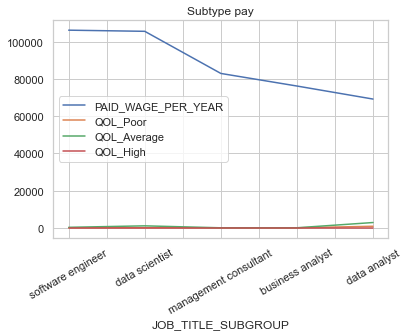

In [52]:
#plot for question 1
data_df_sub1.plot()
plt.xticks(rotation =30 )
plt.title('Subtype pay')
plt.show()

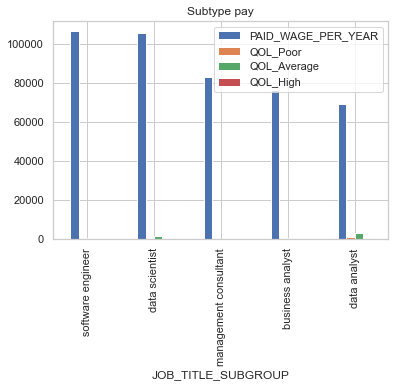

In [58]:
#barplot for question 1
data_df_sub1.plot.bar()
plt.title('Subtype pay')
plt.show()

In [22]:
#I Quality of life
data_df_sub1 = data_df.copy()

data_df_sub1 = data_df_sub1.groupby("JOB_TITLE_SUBGROUP").agg({"PAID_WAGE_PER_YEAR": "mean", "QOL_Poor": "count", "QOL_Average": "count", \
                                                  "QOL_High":"count" }).round(2)

data_df_sub1.sort_values(by=["PAID_WAGE_PER_YEAR"], ascending=False, inplace=True)
data_df_sub1

,PAID_WAGE_PER_YEAR,QOL_Poor,QOL_Average,QOL_High
JOB_TITLE_SUBGROUP,,,,
software engineer,106231.01,4,281,0
data scientist,105612.35,70,1075,0
management consultant,82973.68,3,19,0
business analyst,76209.89,10,43,0
data analyst,69204.16,856,2854,0


In [23]:
# 1a) Which companies have the highest salaries for those sub-types?

#Group by data-related subgroup Jobs and Employers by Salary
data_df2 = data_df.copy()
data_df2 = data_df2.groupby(["JOB_TITLE_SUBGROUP", "EMPLOYER_NAME"]).agg({"PAID_WAGE_PER_YEAR": "mean"}).round(2)

data_df2 = data_df2.sort_values(["PAID_WAGE_PER_YEAR", "EMPLOYER_NAME"], ascending=False).groupby("JOB_TITLE_SUBGROUP").head(5)
data_df2.sort_values(by = ["JOB_TITLE_SUBGROUP", "PAID_WAGE_PER_YEAR"], ascending=False, inplace= True )
data_df2
 

PAID_WAGE_PER_YEAR
JOB_TITLE_SUBGROUP    EMPLOYER_NAME                                                  
software engineer     QUID INC                                               165000.0
                      BLUE KAI INC                                           165000.0
                      PANDORA MEDIA INC                                      162000.0
                      STITCH FIX INC                                         160000.0
                      SAMSUNG SEMICONDUCTOR INC                              156000.0
management consultant INTEGRATED INFORMATICS (USA) INC                       145000.0
                      SLALOM LLC                                             104437.0
                      MASSACHUSETTS MUTUAL LIFE INSURANCE COMPANY            102000.0
                      PROFISEE GROUP INC                                      95000.0
                      SAGENCE INC                                             91000.0
data scientist        THE MATLEN SILVER GROUP INC                            176800.0
                      GUAVUS INC                                             165000.0
                      INTENT MEDIA INC                                       163000.0
                      SCOPELY INC                                            160000.0
                      POSHMARK INC                                           160000.0
data analyst          TELADOC INC                                            150000.0
                      QUIXEY INC                                             150000.0
                      OPEN SYSTEMS TECHNOLOGIES INC                          150000.0
                      KNIGHT CAPITAL AMERICAS LP                             150000.0
                      WEATHERFORD INTERNATIONAL INC                          148000.0
business analyst      SLALOM LLC                                             131000.0
                      EBAY INC                                               128000.0
                      FACEBOOK INC                                           115000.0
                      BARCLAYS CAPITAL SERVICES INC                          111000.0
                      UBS SECURITIES LLC                                     105000.0

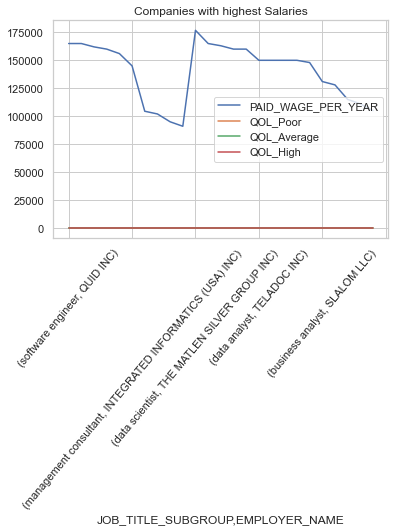

In [55]:
#plot for question 1a
data_df2.plot()
plt.xticks(rotation =50)
plt.title('Companies with highest Salaries')
plt.show()

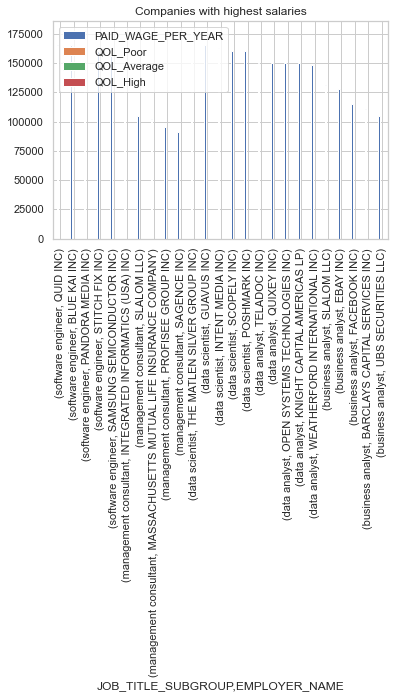

In [57]:
#barplot for question 1a
data_df2.plot.bar()
plt.xticks(rotation =90)
plt.title('Companies with highest salaries')
plt.show()

In [26]:
# 1a) Quality of life
data_df2 = data_df.copy()
data_df2 = data_df2.groupby(["JOB_TITLE_SUBGROUP", "EMPLOYER_NAME"]).agg({"PAID_WAGE_PER_YEAR": "mean", "QOL_Poor": "count", "QOL_Average": "count", \
                                                  "QOL_High":"count" }).round(2)

data_df2 = data_df2.sort_values(["PAID_WAGE_PER_YEAR", "EMPLOYER_NAME"], ascending=False).groupby("JOB_TITLE_SUBGROUP").head(5)
data_df2.sort_values(by = ["JOB_TITLE_SUBGROUP", "PAID_WAGE_PER_YEAR"], ascending=False, inplace= True )
data_df2

PAID_WAGE_PER_YEAR  \
JOB_TITLE_SUBGROUP    EMPLOYER_NAME                                                     
software engineer     QUID INC                                               165000.0   
                      BLUE KAI INC                                           165000.0   
                      PANDORA MEDIA INC                                      162000.0   
                      STITCH FIX INC                                         160000.0   
                      SAMSUNG SEMICONDUCTOR INC                              156000.0   
management consultant INTEGRATED INFORMATICS (USA) INC                       145000.0   
                      SLALOM LLC                                             104437.0   
                      MASSACHUSETTS MUTUAL LIFE INSURANCE COMPANY            102000.0   
                      PROFISEE GROUP INC                                      95000.0   
                      SAGENCE INC                                             91000.0   
data scientist        THE MATLEN SILVER GROUP INC                            176800.0   
                      GUAVUS INC                                             165000.0   
                      INTENT MEDIA INC                                       163000.0   
                      SCOPELY INC                                            160000.0   
                      POSHMARK INC                                           160000.0   
data analyst          TELADOC INC                                            150000.0   
                      QUIXEY INC                                             150000.0   
                      OPEN SYSTEMS TECHNOLOGIES INC                          150000.0   
                      KNIGHT CAPITAL AMERICAS LP                             150000.0   
                      WEATHERFORD INTERNATIONAL INC                          148000.0   
business analyst      SLALOM LLC                                             131000.0   
                      EBAY INC                                               128000.0   
                      FACEBOOK INC                                           115000.0   
                      BARCLAYS CAPITAL SERVICES INC                          111000.0   
                      UBS SECURITIES LLC                                     105000.0   

                                                                   QOL_Poor  \
JOB_TITLE_SUBGROUP    EMPLOYER_NAME                                           
software engineer     QUID INC                                            0   
                      BLUE KAI INC                                        0   
                      PANDORA MEDIA INC                                   0   
                      STITCH FIX INC                                      0   
                      SAMSUNG SEMICONDUCTOR INC                           0   
management consultant INTEGRATED INFORMATICS (USA) INC                    0   
                      SLALOM LLC                                          0   
                      MASSACHUSETTS MUTUAL LIFE INSURANCE COMPANY         0   
                      PROFISEE GROUP INC                                  0   
                      SAGENCE INC                                         0   
data scientist        THE MATLEN SILVER GROUP INC                         0   
                      GUAVUS INC                                          0   
                      INTENT MEDIA INC                                    0   
                      SCOPELY INC                                         0   
                      POSHMARK INC                                        0   
data analyst          TELADOC INC                                         0   
                      QUIXEY INC                                          0   
                      OPEN SYSTEMS TECHNOLOGIES INC                       0   
                      KNIGHT CAPITAL AMERICAS LP                          0   
    

In [27]:
# 1b) - Changes with location of the job?

#Location
data_df3 = data_df.copy()

data_df3 = data_df3.groupby(["JOB_TITLE_SUBGROUP", "WORK_STATE"]).agg({"PAID_WAGE_PER_YEAR": "mean"}).round(2)
data_df3 = data_df3.sort_values(["PAID_WAGE_PER_YEAR", "WORK_STATE"], ascending = False).groupby("JOB_TITLE_SUBGROUP").head(3)
data_df3.sort_values(by = "JOB_TITLE_SUBGROUP", ascending=False, inplace= True )
data_df3

PAID_WAGE_PER_YEAR
JOB_TITLE_SUBGROUP    WORK_STATE                       
software engineer     Oklahoma                125000.00
                      New York                119703.89
                      California              116683.51
management consultant Texas                   108500.00
                      Georgia                  99718.50
                      Massachusetts            98666.67
data scientist        Washington              116191.51
                      California              114885.29
                      Minnesota               111457.00
data analyst          Connecticut              81490.76
                      California               77995.68
                      New Hampshire            75943.25
business analyst      Connecticut             105000.00
                      Florida                  95000.00
                      California               94304.24

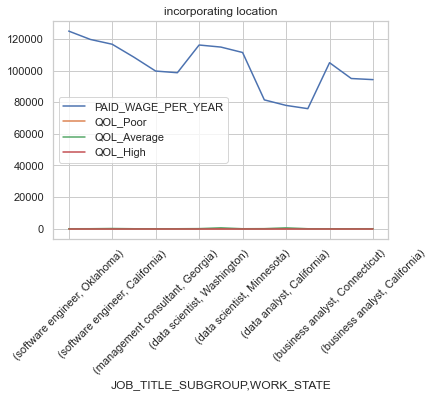

In [59]:
#plot for question 1b
data_df3.plot()
plt.xticks(rotation =45)
plt.title('incorporating location')
plt.show()

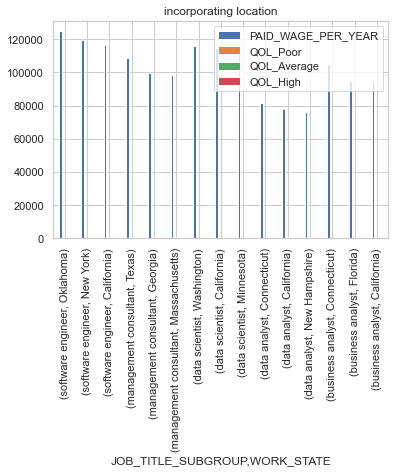

In [60]:
#barplot for question 1b
data_df3.plot.bar()
plt.xticks(rotation =90)
plt.title('incorporating location')
plt.show()

In [30]:
#1b) Quality of Life
data_df3 = data_df.copy()
data_df3 = data_df3.groupby(["JOB_TITLE_SUBGROUP", "WORK_STATE"]).agg({"PAID_WAGE_PER_YEAR": "mean", "QOL_Poor": "count", "QOL_Average": "count", \
                                                  "QOL_High":"count" }).round(2)
data_df3 = data_df3.sort_values(["PAID_WAGE_PER_YEAR", "WORK_STATE"], ascending = False).groupby("JOB_TITLE_SUBGROUP").head(3)
data_df3.sort_values(by = "JOB_TITLE_SUBGROUP", ascending=False, inplace= True )
data_df3


PAID_WAGE_PER_YEAR  QOL_Poor  \
JOB_TITLE_SUBGROUP    WORK_STATE                                    
software engineer     Oklahoma                125000.00         0   
                      New York                119703.89         0   
                      California              116683.51         0   
management consultant Texas                   108500.00         0   
                      Georgia                  99718.50         0   
                      Massachusetts            98666.67         0   
data scientist        Washington              116191.51         0   
                      California              114885.29         1   
                      Minnesota               111457.00         0   
data analyst          Connecticut              81490.76        18   
                      California               77995.68        62   
                      New Hampshire            75943.25         0   
business analyst      Connecticut             105000.00         0   
                      Florida                  95000.00         0   
                      California               94304.24         1   

                                     QOL_Average  QOL_High  
JOB_TITLE_SUBGROUP    WORK_STATE                            
software engineer     Oklahoma                 1         0  
                      New York                18         0  
                      California             160         0  
management consultant Texas                    2         0  
                      Georgia                  2         0  
                      Massachusetts            3         0  
data scientist        Washington              82         0  
                      California             591         0  
                      Minnesota                2         0  
data analyst          Connecticut             48         0  
                      California             561         0  
                      New Hampshire            4         0  
business analyst      Connecticut              1         0  
                      Florida                  1         0  
                      California               8         0

In [31]:
# 1c) Quality of life

Enter State to Explore: California
Would you like to explore another state (Y/N)y
Enter State to Explore: Wisconsin
Would you like to explore another state (Y/N)y
Enter State to Explore: Alabama
Would you like to explore another state (Y/N)n


,PAID_WAGE_PER_YEAR
WORK_STATE,
California,98353.68
Alabama,69803.33
Wisconsin,67242.32


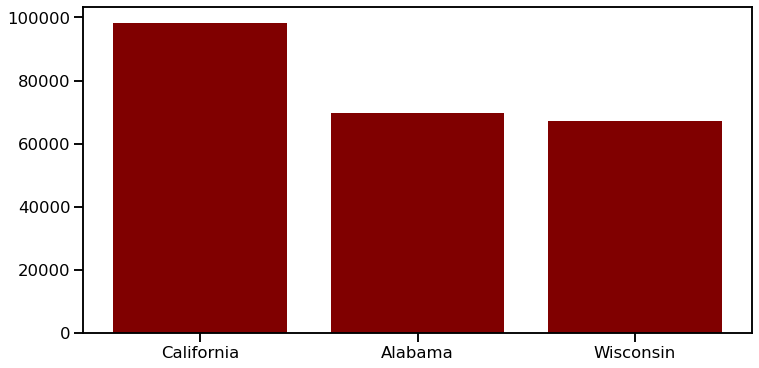

In [32]:
#2a) What states (of those I am willing to move to) have the highest paying data-related salaries
#Add Quality of Life

data_df_states = data_df.copy()
data_df_states = data_df_states.groupby("WORK_STATE").agg({"PAID_WAGE_PER_YEAR": "mean"}).round(2)
data_df_states = data_df_states.sort_values(by = "PAID_WAGE_PER_YEAR", ascending = False)

lstt = []
add = "Y"

while add == "Y":
  selection = input("Enter State to Explore: ")
  lstt.append(selection)
  add = input("Would you like to explore another state (Y/N)").upper()

data_df_states = data_df_states.loc[lstt].sort_values(by = "PAID_WAGE_PER_YEAR", ascending = False)

plt.figure(figsize = (12, 6))
plt.bar(data_df_states.index, data_df_states['PAID_WAGE_PER_YEAR'], color = 'maroon')

data_df_states

In [33]:
# - Differences between job sub-categories?
# - Which companies have the highest salaries for those sub-types?

data_df4 = data_df.copy()

stlst = []
choice = int(input("How many States would you like to explore? "))
if choice > 50 or choice <= 0 :
  print("Enter a value above 0 and under 50")
  choice = int(input("How many States would you like to explore? "))

for x in range(choice):
  st = input(f'Enter Name of State {x+1}: ').upper()
  if len(st) != 2:
    print("Please Enter state in abbreviated format e.g 'CA'")
    st = input(f'Enter Name of State {x+1}: ').upper()
  stlst.append(st)

data_df4.reset_index(inplace=True)


comp = input("Would you like to view companies in the state(s)? (Y/N)").upper()

i = -1
for x in data_df4['WORK_STATE_ABBREVIATION']:
  i+=1
  if x in stlst:
    i+=0
  else:
    data_df4.drop(index=i, inplace=True)

if comp == "Y":
  data_df4 = data_df4.groupby(["WORK_STATE", "JOB_TITLE_SUBGROUP", "EMPLOYER_NAME"]).agg({"PAID_WAGE_PER_YEAR": "mean"}).round(2)
  data_df4.sort_values(by=["WORK_STATE", "PAID_WAGE_PER_YEAR"], ascending=False, inplace=True)
else:
  data_df4 = data_df4.groupby(["WORK_STATE", "JOB_TITLE_SUBGROUP"]).agg({"PAID_WAGE_PER_YEAR": "mean"}).round(2)
  data_df4.sort_values(by=["WORK_STATE", "PAID_WAGE_PER_YEAR"], ascending=False, inplace=True)
  
data_df4



How many States would you like to explore? 2
Enter Name of State 1: WI
Enter Name of State 2: OR
Would you like to view companies in the state(s)? (Y/N)Y


PAID_WAGE_PER_YEAR
WORK_STATE JOB_TITLE_SUBGROUP EMPLOYER_NAME                                              
Wisconsin  data analyst       SYMPHONY CORPORATION                               90000.00
           data scientist     RENAISSANCE LEARNING INC                           90000.00
           data analyst       SENTRY INSURANCE                                   84593.50
                              MARSHALL & SWIFT/BOECKH LLC                        82934.00
           data scientist     METAMODELING ANALYTICS LLC                         80000.00
           data analyst       REVEREIT LLC                                       74880.00
                              JOHNSON CONTROLS INC                               68203.50
                              CSXPERTS LLC                                       65000.00
                              WITH LLC                                           65000.00
                              GLOBAL PHARMATEK LLC                               64000.00
                              GREEN PHARMATEK INC                                64000.00
                              WONDERBOX TECHNOLOGIES LLC                         63125.00
                              VEDICSOFT                                          62441.60
                              TT TECHNOLOGIES INC                                62000.00
                              GEORGE VENTURES LLC                                60500.00
                              DEAN HEALTH SYSTEMS INC                            60000.00
                              ETEAM SOLUTIONS INC                                60000.00
                              MICROINFO INC                                      60000.00
                              QUADRANT 4 SYSTEM CORPORATION                      60000.00
                              VASTIKA INC                                        60000.00
                              VESTICA HEALTHCARE LLC                             56500.00
                              ENTERFORCE INC                                     38000.00
Oregon     data scientist     NIKE INC                                          120000.00
                              ACT-ON SOFTWARE                                   110000.00
                              INTEL CORPORATION                                  99653.00
                              EXTERRO INC                                        94910.40
           software engineer  JLM PACIFIC EPOCH LLC                              80000.00
           data analyst       EPIQ CLASS ACTION & CLAIM SOLUTIONS INC            72800.00
                              YETI TECHNOLOGIES LLC DBA                          72800.00
                              ESCO CORPORATION                                   71999.72
                              VESTA CORPORATION                                  66500.00
                              IBM INDIA PRIVATE LTD                              64043.00
                              AMTEX SYSTEMS INC                                  60000.00
                              TEK ERP LLC                                        60000.00
                              SPLN INTERNATIONAL INC                             56222.40

In [34]:
# III. How do offered salaries compare to the prevailing wage?
# - Are there job sub-categories that tend to get over-paid or under-paid?
mycopy = data_df.copy()
mycopy = mycopy[(mycopy["PAID_WAGE_SUBMITTED_UNIT"] != "bi-weekly")]
mycopy.reset_index(drop=True, inplace=True)

index = 0
for x in mycopy["PREVAILING_WAGE_SUBMITTED_UNIT"]:
  if x == mycopy["PAID_WAGE_SUBMITTED_UNIT"].iloc[index]:
    index += 1
  else:
    mycopy.drop(index, inplace=True)
    index += 0
    
mycopy["Pay_Split_Under/Over"] = mycopy["PREVAILING_WAGE_SUBMITTED"] - mycopy["PAID_WAGE_SUBMITTED"]
mycopy["% Change"] = ((mycopy["PREVAILING_WAGE_SUBMITTED"] - mycopy["PAID_WAGE_SUBMITTED"])/mycopy["PREVAILING_WAGE_SUBMITTED"]).round(2)

#Used for next questions
mycopy2 = mycopy.copy()

mycopy2 = mycopy2.groupby(["JOB_TITLE_SUBGROUP","PAID_WAGE_SUBMITTED_UNIT"]).agg({"PREVAILING_WAGE_SUBMITTED":"mean", \
                                                                                "PAID_WAGE_SUBMITTED":"mean", "Pay_Split_Under/Over": "mean", \
                                                                                "% Change": "mean"}).round(2)
mycopy2

PREVAILING_WAGE_SUBMITTED  \
JOB_TITLE_SUBGROUP    PAID_WAGE_SUBMITTED_UNIT                              
business analyst      hour                                          18.83   
                      year                                       69534.14   
data analyst          hour                                          30.35   
                      month                                       4329.00   
                      week                                        1071.00   
                      year                                       62207.39   
data scientist        hour                                          40.05   
                      year                                       89332.17   
management consultant year                                       69578.27   
software engineer     hour                                          43.84   
                      year                                       94208.27   

                                                PAID_WAGE_SUBMITTED  \
JOB_TITLE_SUBGROUP    PAID_WAGE_SUBMITTED_UNIT                        
business analyst      hour                                    21.00   
                      year                                 77485.57   
data analyst          hour                                    33.51   
                      month                                 4541.33   
                      week                                  1173.07   
                      year                                 69207.01   
data scientist        hour                                    49.66   
                      year                                105595.67   
management consultant year                                 82973.68   
software engineer     hour                                    50.97   
                      year                                106237.40   

                                                Pay_Split_Under/Over  % Change  
JOB_TITLE_SUBGROUP    PAID_WAGE_SUBMITTED_UNIT                                  
business analyst      hour                                     -2.17     -0.11  
                      year                                  -7951.44     -0.13  
data analyst          hour                                     -3.16     -0.11  
                      month                                  -212.32     -0.06  
                      week                                   -102.07     -0.09  
                      year                                  -6999.62     -1.39  
data scientist        hour                                     -9.61     -0.24  
                      year                                 -16263.50     -0.21  
management consultant year                                 -13395.41     -0.21  
software engineer     hour                                     -7.13     -0.15  
                      year                                 -12029.13     -0.14

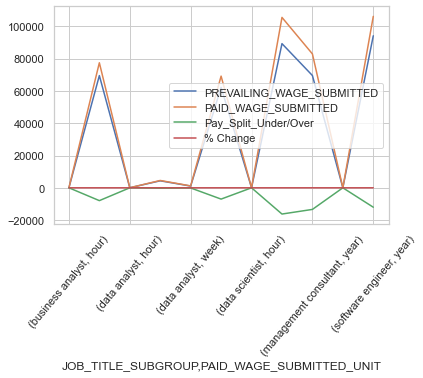

In [49]:
mycopy2.plot()
plt.xticks(rotation =50)
plt.show()

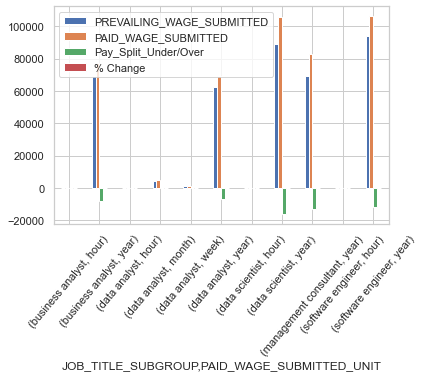

In [51]:
mycopy2.plot.bar()
plt.xticks(rotation =50)
plt.show()

In [35]:
mycopy = data_df.copy()

#Drop != time unit values
index = 0
for x in mycopy["PREVAILING_WAGE_SUBMITTED_UNIT"]:
  if x == mycopy["PAID_WAGE_SUBMITTED_UNIT"].iloc[index]:
    index += 1
  else:
    mycopy.drop(index, inplace=True)
    index += 0

#Validate
errors = 0
counter = 0
for x in mycopy["PREVAILING_WAGE_SUBMITTED_UNIT"]:
  if x == mycopy["PAID_WAGE_SUBMITTED_UNIT"].iloc[counter]:
    counter += 1
  else:
    errors += 1
    counter += 0

print(f'ERRORS: {errors}')

ERRORS: 1472


In [36]:
 #Are there companies that tend to over-pay or under-pay?
#Add Quality of Life
mycopy = data_df.copy()
mycopy = mycopy[(mycopy["PAID_WAGE_SUBMITTED_UNIT"] != "bi-weekly")]
mycopy.reset_index(drop=True, inplace=True)
index = 0
for x in mycopy["PREVAILING_WAGE_SUBMITTED_UNIT"]:
  if x == mycopy["PAID_WAGE_SUBMITTED_UNIT"].iloc[index]:
    index += 1
  else:
    mycopy.drop(index, inplace=True)
    index += 0
mycopy["Pay_Split_Under/Over"] = mycopy["PREVAILING_WAGE_SUBMITTED"] - mycopy["PAID_WAGE_SUBMITTED"]
mycopy["% Change"] = ((mycopy["PREVAILING_WAGE_SUBMITTED"] - mycopy["PAID_WAGE_SUBMITTED"])/mycopy["PREVAILING_WAGE_SUBMITTED"]).round(2)

mycopy = mycopy.groupby("EMPLOYER_NAME").agg({"% Change":"mean", "EMPLOYER_NAME": "count"}).round(2)
mycopy = mycopy.sort_values(by = "% Change")
mycopy = mycopy[(mycopy["EMPLOYER_NAME"] >= 5)]
mycopy.head(10)
#mycopy
#mycopy[(mycopy["% Change"] >= -1)]

,% Change,EMPLOYER_NAME
EMPLOYER_NAME,,
KABBAGE INC,-0.83,5
WORLDQUANT LLC,-0.78,14
THE ALLANT GROUP,-0.70,6
QUADRANT 4 SYSTEM CORPORATION,-0.52,8
WOOD MACKENZIE INC,-0.52,6
QUID INC,-0.51,6
MONSANTO COMPANY,-0.48,5
AIG PC GLOBAL SERVICES INC,-0.44,11
GLOBAL PHARMATEK LLC,-0.42,33


In [37]:
#Do Diff Subgroups of jobs have a higher chance of case approval?
df = data_df.copy()
df = df.groupby(by=["JOB_TITLE_SUBGROUP", "CASE_STATUS"]).agg({"CASE_STATUS": "count"})
df


CASE_STATUS
JOB_TITLE_SUBGROUP    CASE_STATUS                     
business analyst      certified                     49
                      certified-withdrawn            3
                      withdrawn                      1
data analyst          certified                   3273
                      certified-expired              2
                      certified-withdrawn          245
                      denied                        58
                      withdrawn                    132
data scientist        certified                   1006
                      certified-withdrawn           79
                      denied                        16
                      withdrawn                     44
management consultant certified                     21
                      denied                         1
software engineer     certified                    240
                      certified-expired              1
                      certified-withdrawn           28
                      denied                         6
                      withdrawn                     10

In [38]:
df = data_df.copy()
lst=[]
jobs = ["business analyst", "data analyst", "data scientist", "management consultant", "software engineer"]
df = df.groupby(by=["JOB_TITLE_SUBGROUP", "CASE_STATUS"]).agg({"CASE_STATUS": "count"})

for x in jobs:
  lst.append((df.loc[x].iloc[0,0]/sum(df.loc[x].iloc[:,0])).round(2))
lst

DisplayDf = pd.DataFrame()
DisplayDf["Job"] = [x for x in jobs]
DisplayDf["Certified Rate"] = [y for y in lst]
DisplayDf

,Job,Certified Rate
0,business analyst,0.92
1,data analyst,0.88
2,data scientist,0.88
3,management consultant,0.95
4,software engineer,0.84


<AxesSubplot:xlabel='Job', ylabel='Certified Rate'>

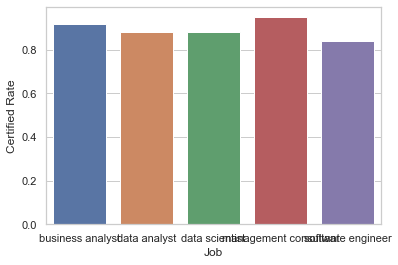

In [39]:
#Visualization for Certified Rate
sns.set_theme(style="whitegrid")
sns.barplot(x= DisplayDf.iloc[:,0], y= DisplayDf.iloc[:,1], data=DisplayDf)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

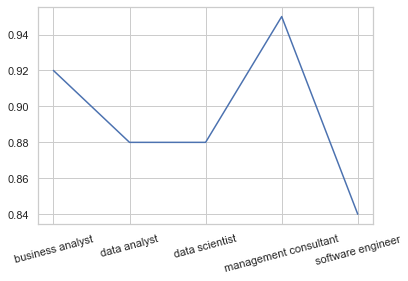

In [40]:
#plot for certified rate
plt.plot(DisplayDf["Job"],DisplayDf["Certified Rate"])
plt.xticks(rotation =15)

In [41]:
#Export Clean Dataset

data_df.to_csv('Salary_data_corrected.csv') 

In [42]:
##Question 2:
#Length of time of case decision and job category?
#-Correlation?
df = data_df.copy()

df = df.astype({'DECISION_DATE': 'datetime64[ns]','CASE_RECEIVED_DATE':'datetime64[ns]' })
df['DECISION_LENGTH'] = df['DECISION_DATE']-df['CASE_RECEIVED_DATE'] 

df.groupby('JOB_TITLE_SUBGROUP')['DECISION_LENGTH'].agg(lambda x: x.mean())



JOB_TITLE_SUBGROUP
business analyst        24 days 04:31:41.886792452
data analyst            30 days 22:12:29.110512129
data scientist          25 days 00:37:43.755458515
management consultant    6 days 04:21:49.090909090
software engineer       55 days 21:53:41.052631579
Name: DECISION_LENGTH, dtype: timedelta64[ns]